# 1. Wstęp

## Argumenty za wyłączeniem chmurowych symulatorów kwantowych

Do 15 maja 2024 r. IBM Quantum udostępniał symulatory kwantowe w chmurze. Wyłączenie symulatorów w chmurze argumentowane jest następująco:
1. Ograniczenia symulatorów do badań (ang. *research*) lub eksperymentów. 
    1. Przy wykorzystaniu nawet najnowczoeśniejszych komputerów klasycznych, pozwalają na symulowanie działanie systemów kwantowach do ok. 50 kubitów. Ograniczenie to wynika z wykładniczego wzrostu zapotrzebowania na moc obliczeniową przy symulacji większych systemów kwantowych. 
    1. Symulatory nie potrafią uchwycić szumów (ang. *noise*) i błędów (ang. *error*)  w modelach
1. Zbudowanie nowych umiejętności
    1. Konieczność stosowania strategii ograniczania błędów 
    1. Rozumienie zjawisk kwantowych
    1. Zwiększenie kreatywności i innowacyjności poprzez używanie prawdziwych komputerów kwantowych
1. Dostosowanie algorytmów do sprzętu kwantowego
    1. Sprzęt kwantowy pozwala na wykrozystanie możliwości systemów kwantowych
    1. Parametryzacja Ansatz-u, topologii obwodów w celu maksymalizacji wydajności poprzez eksperymenty na sprzęcie kwantowym


## Konieczność migracji do symulatorów na komputerach lokalnych

Korzystanie z symulatorów lokalnych wymaga:

1. Określenia sztucznego backendu *fake backend* poleceniem `qiskit_ibm_runtime.fake_provider` lub 
1. Określenia backendu w `Qiskit Aer` przed rozpoczęciem sesji lub inicjalizacją pierwszego obiektu

### Fake backend

Sztuczne backendy naśladują zachowanie systemów kwantowych IBM wykorzystując migawki systemu (ang. *system snapshots*). Informacje o stanie systemu takie jak graf mapy powiązań (ang. *coupling map*), podstawowe bramki, własności kubitów. Podczas symulacji z wykorzystaniem takiego backendu dodawany jest model szumów. 

### Aer simulator

Symulatory `Qiskit Aer` mogą obsługiwać złożone obwody oraz realistyczne modele szumów. Dostarczają intefejsu do eksperymentów z obwodami kwantowymi z uwzględnieniem szumó lub bez nich. Pozwalają na wykorzystanie interfejsów *Message Passing Interface* (MPI). `Qiskit Aer` jest zależny od wersji głównego pakietu `Qiskit` oraz wykorzystywanej platformy. https://qiskit.github.io/qiskit-aer/

# 2. Informacje o Qiskit v.1.0

W wersji v.1.0 systemy kwantowe mogą być symulowane albo na komputerze lokalnym albo wykonywane na rzeczywistym sprzęcie kwantowym w chmurze IBM.

<img src="qiskit_environment.png" alt="Środowisko Qiskit v.1.0" title="Środowisko Qiskit v.1.0" style="width:70%;" />

Źródło: __[Using Qiskit v1.x | Part 1 - Overview](https://www.youtube.com/watch?v=KmMS0S6BMao)__ .

## 2.1 Moduł `quantum_info`

Używany do analizy własności kwantowych wyniku obwodu kwantowego. 

Dokumentacja: __https://docs.quantum.ibm.com/api/qiskit/quantum_info__ .

In [6]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

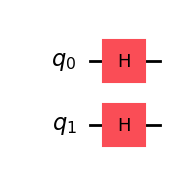

In [9]:
qc = QuantumCircuit(2)  # dwa kubity
qc.h([0,1])             # bramka Hadamrada na kubicie nr 0 i kubicie nr 1
qc.draw('mpl')          # wyświetlenie za pomocą pakietu matplotlib

Alaliza obiektu klasy `Statevector`

In [33]:
ψ = qi.Statevector(qc)

In [34]:
print(type(ψ))

<class 'qiskit.quantum_info.states.statevector.Statevector'>


Obiekt typu `Statevector` posiada dodatkowo szereg metod, które zostaną zaprezentowane poniżej.

1. Prawdopodobieństwa dla każdego ze stanów:

In [35]:
print('Słownik:')
print(ψ.probabilities_dict(decimals=2))
print('')
print('Lista:')
print(ψ.probabilities(decimals=2))

Słownik:
{'00': 0.25, '01': 0.25, '10': 0.25, '11': 0.25}

Lista:
[0.25 0.25 0.25 0.25]


2. Graficzna reprezentacja

In [36]:
ψ.draw('latex')

<IPython.core.display.Latex object>

3. Przeprowadzenie symulacji dla zadanej liczby próbek

In [42]:
counts = ψ.sample_counts(shots=1024)
print(counts)

{'00': 256, '01': 235, '10': 241, '11': 292}


4. Histogram

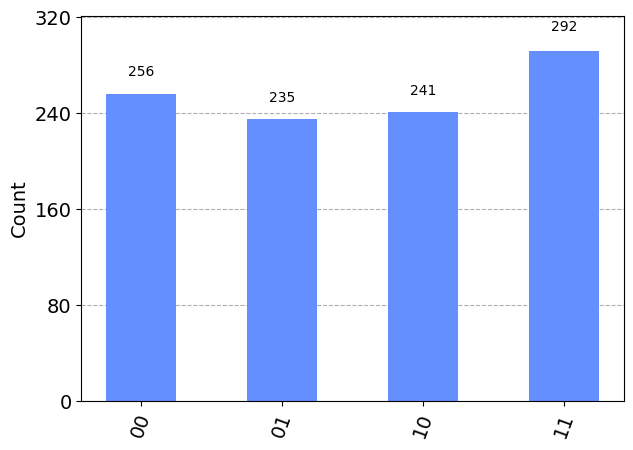

In [43]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

5. Wyniki każdej z prób

In [47]:
samples = ψ.sample_memory(shots=1024)
print(samples)

['11' '11' '01' ... '11' '10' '00']


Wykorzystując standardową funkcją `Counter` z biblioteki `collections` zwróci podobne wyniki jak `sample_counts()`, ale klucze w słowniku wynikowym będą w innej kolejności. 


In [49]:
from collections import Counter
print(Counter(samples))

Counter({'01': 264, '00': 256, '11': 252, '10': 252})


# 3. Przygotowanie środowiska 

## 3.1. Sprawdzenie wersji zainstalowanych pakietów

In [2]:
import qiskit
import qiskit_aer

print(qiskit.__version__)
print(qiskit_aer.__version__)

1.0.2
0.14.0.1


<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>